.

<h1 style="text-align:center; font-size:36px;color:TEAL">|||||| 📈 PRODIGY INFOTECH TASK 5 💡 ||||||</h1>

<h1 style="text-align:center; font-size:16px;color:TEAL"> TASK 5- Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.</h1>

<h1 style="text-align:center; font-size:36px;color:TEAL"> ----------------------------------------------------------------------------</h1>

<H1 STYLE=color:TEAL>IMPORTING LIBRARIES</h1>

In [2]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

<H1 STYLE=color:TEAL>LOADING DATA SET</h1>

In [4]:
file_path = 'US_Accidents_March23.csv'

raw_df = pd.read_csv(file_path)

raw_df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


<h1 style=color:teal>
Data Preparation and Cleaning</h1>

In [5]:
# find names of columns
raw_df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [6]:
# find shape of dataset
raw_df.shape

(7728394, 46)

`rows : 7728394
 columns : 46`

In [7]:
# information on dataset
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [8]:
# See the statistics on numerical data
raw_df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [9]:
# check how many numeric columns are there
numeric_cols = raw_df.select_dtypes(include=np.number).columns.str.split(',')
print(numeric_cols)
print(len(numeric_cols))

Index([         ['Severity'],         ['Start_Lat'],         ['Start_Lng'],
                 ['End_Lat'],           ['End_Lng'],      ['Distance(mi)'],
          ['Temperature(F)'],     ['Wind_Chill(F)'],       ['Humidity(%)'],
            ['Pressure(in)'],    ['Visibility(mi)'],   ['Wind_Speed(mph)'],
       ['Precipitation(in)']],
      dtype='object')
13


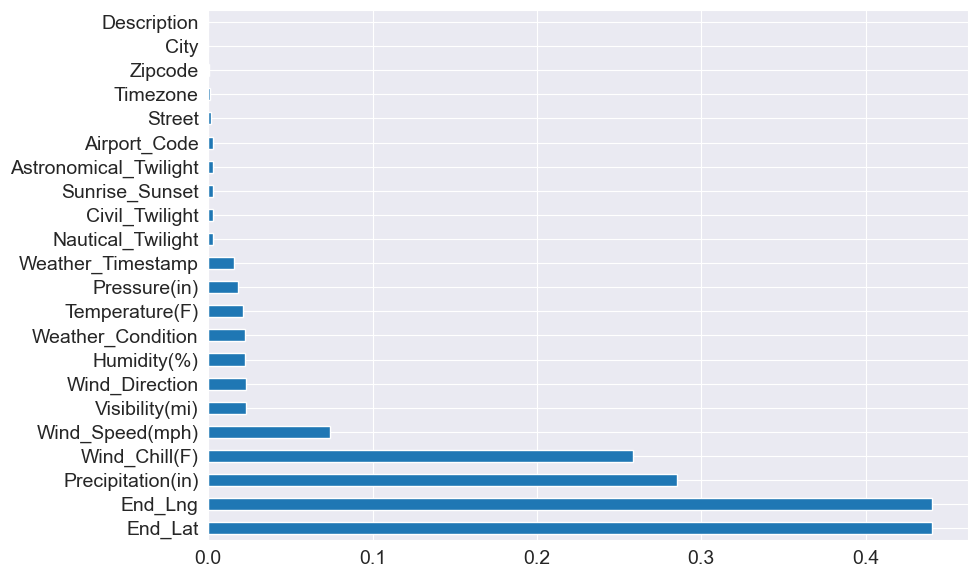

In [10]:
# Missing values in percentage
missing_values_pct = raw_df.isna().sum().sort_values(ascending=False)/len(raw_df)
missing_values_pct[missing_values_pct != 0].plot(kind ='barh')
plt.tight_layout()

<h1 style=color:teal>EDA
</h1>


In [11]:
raw_df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

<h1 style=color:teal>CITY
</h1>

In [12]:
# Total unique cities
len(raw_df['City'].unique())

13679

In [13]:
# City names
raw_df['City'].unique()[:100]

array(['Dayton', 'Reynoldsburg', 'Williamsburg', 'Westerville',
       'Columbus', 'Miamisburg', 'Johnstown', 'Dublin',
       'Canal Winchester', 'Lebanon', 'Sabina', 'Goshen', 'Waynesville',
       'Springboro', 'Carroll', 'Oregonia', 'Independence',
       'Maple Heights', 'Grove City', 'Findlay', 'Fairborn', 'Piqua',
       'New Richmond', 'Batavia', 'Galena', 'Barberton', 'Akron',
       'Mansfield', 'Cleveland', 'Bethel', 'Pataskala', 'Seville',
       'Bellville', 'Troy', 'Wilmington', 'North Olmsted', 'Groveport',
       'Orient', 'Tiro', 'Strongsville', 'Beavercreek', 'Circleville',
       'Peebles', 'Hurricane', 'Xenia', 'Elyria', 'Pickerington',
       'Burbank', 'Zanesville', 'North Baltimore', 'Mount Sterling',
       'Tipp City', 'Moraine', 'Hilliard', 'Bowling Green', 'Maineville',
       'Vermilion', 'Milford', 'Brookpark', 'Fraziers Bottom',
       'Cambridge', 'Delaware', 'Moscow', 'Oberlin', 'Sardinia',
       'Lewis Center', 'Urbancrest', 'Brecksville', 'Frankfort',

In [14]:
# Top 20 cities by accident
raw_df['City'].value_counts().sort_values(ascending=False).head(20)

City
Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
Name: count, dtype: int64

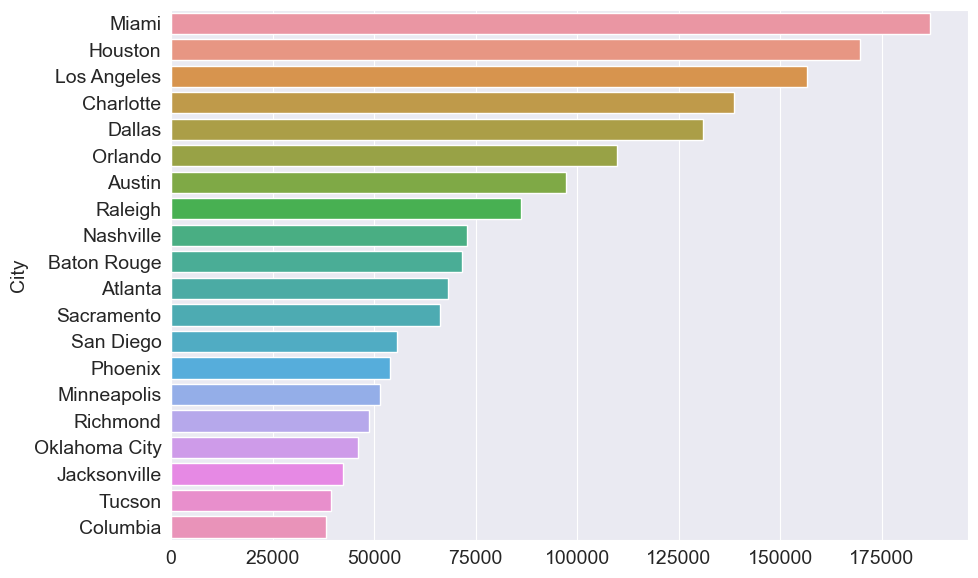

In [15]:
# Let's see it on graph
top_20 = raw_df['City'].value_counts().sort_values(ascending=False).head(20)
sns.barplot(y=top_20.keys(),x=top_20.values)
plt.tight_layout()

In [16]:
# bottom 20 cities by accident
raw_df['City'].value_counts().sort_values(ascending=True).head(20)

City
American Fork-Pleasant Grove    1
Fluker                          1
Sidney Center                   1
Bon Secour                      1
Atlantic Mine                   1
Everglades City                 1
Indian Valley                   1
Stromsburg                      1
Star Junction                   1
Bruington                       1
Cooks                           1
Platte Center                   1
Curlew                          1
Downing                         1
Mapleville                      1
Stockton Springs                1
Okaton                          1
Mohall                          1
Vashon                          1
East China                      1
Name: count, dtype: int64

In [20]:
cities_by_accident = raw_df['City'].value_counts()
high_accident_cities = cities_by_accident[cities_by_accident >= 1000]
low_accident_cities = cities_by_accident[cities_by_accident  < 1000]

In [21]:
len(high_accident_cities)/len(cities_by_accident)

0.08904810644831115

**8.9% of cities have high accidents**

In [22]:
len(low_accident_cities)/len(cities_by_accident)

0.9109518935516888

**91% of cities have low accidents**

<Axes: xlabel='count', ylabel='Count'>

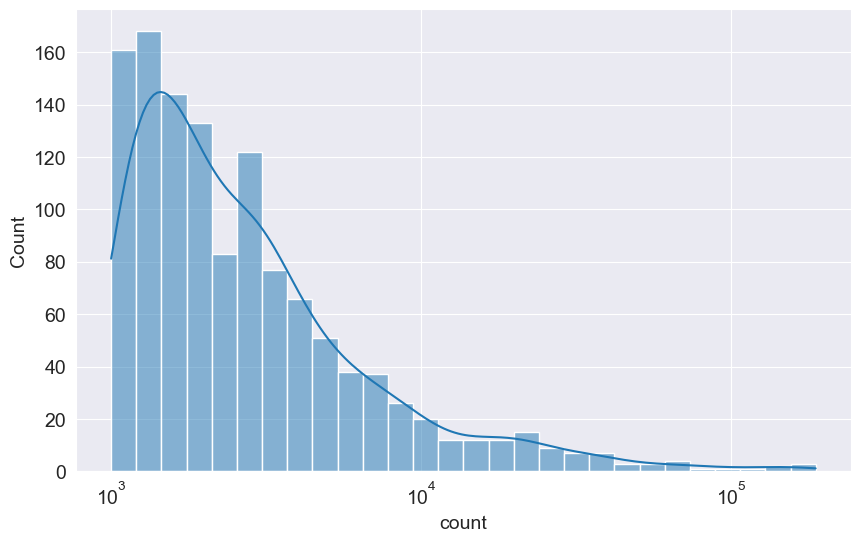

In [23]:
sns.histplot(high_accident_cities, log_scale=True,kde=True)

<Axes: xlabel='count', ylabel='Count'>

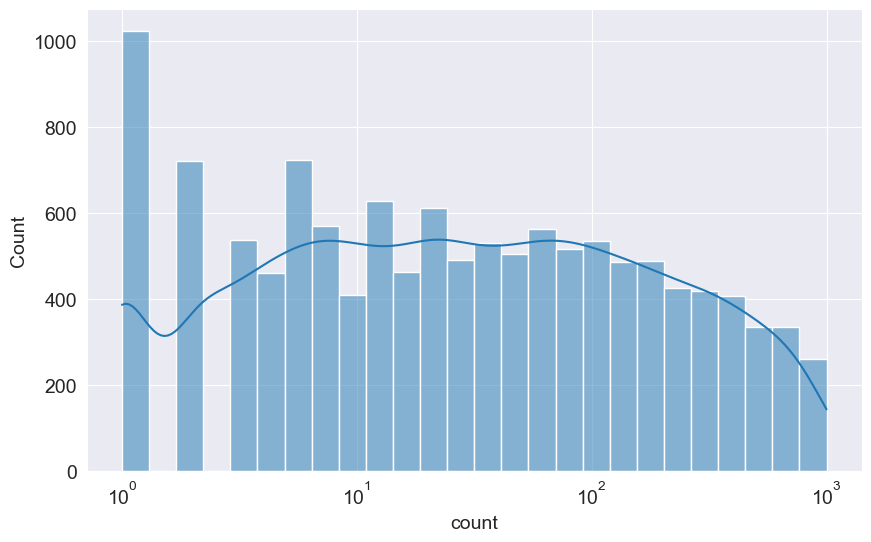

In [24]:
sns.histplot(low_accident_cities, log_scale=True, kde=True)

In [25]:
cities_by_accident[cities_by_accident == 1]

City
Lake Andes                      1
Catoctin                        1
Duck Hill                       1
Westbrookville                  1
Saint Croix                     1
                               ..
Benkelman                       1
Old Appleton                    1
Wildrose                        1
Mc Nabb                         1
American Fork-Pleasant Grove    1
Name: count, Length: 1023, dtype: int64

- **Over 1023 cities reported just 1 accident.**
- **This might be a outlier better to remove them.**

<h1 style=color:teal>START TIME
</h1>

In [26]:
raw_df['Start_Time'][0]

'2016-02-08 05:46:00'

In [27]:
raw_df['Start_Time'] = pd.to_datetime(raw_df['Start_Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [28]:
hour = raw_df['Start_Time'].dt.hour

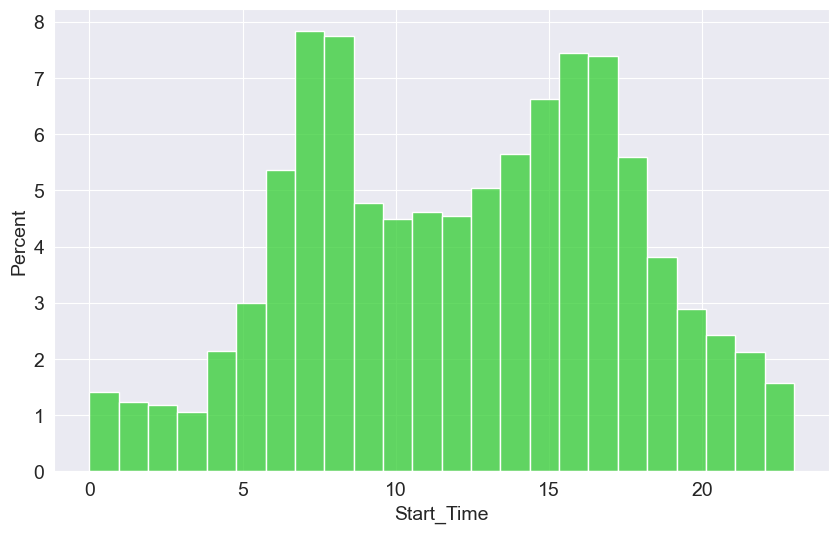

In [54]:
sns.histplot(hour, color='LIMEGREEN', bins=24, stat='percent');

- **Around 7 and 8 in morning there is a most spike in accident which might be due to office hours, college time etc.**
- **Next spike is Around 4 and 5 in evening which might be due to going back to home from office or Play hours for people.**

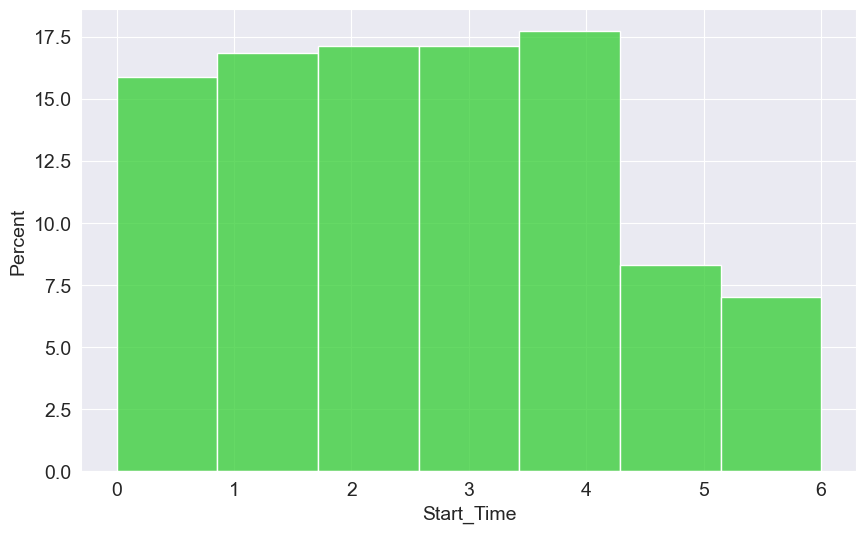

In [56]:
day_of_week =  raw_df['Start_Time'].dt.dayofweek
sns.histplot(day_of_week, color='LIMEGREEN', bins=7, stat='percent');

<h1 style=color:teal> WEEKS</h1>

<h1 style=color:teal> MONDAY</h1>

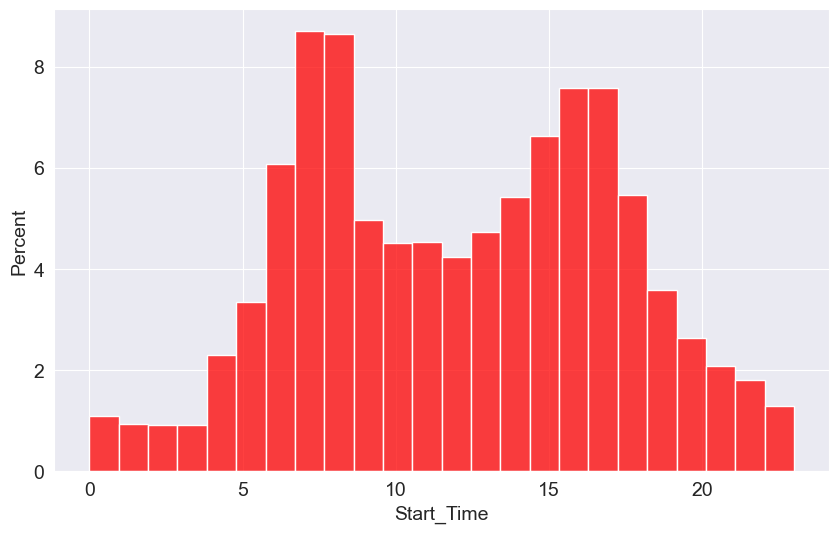

In [31]:
mondays_start_time = raw_df['Start_Time'][raw_df['Start_Time'].dt.dayofweek == 0]
sns.histplot(mondays_start_time.dt.hour, color='red', bins=24, stat='percent');

<h1 style=color:teal> TUESDAY</h1>

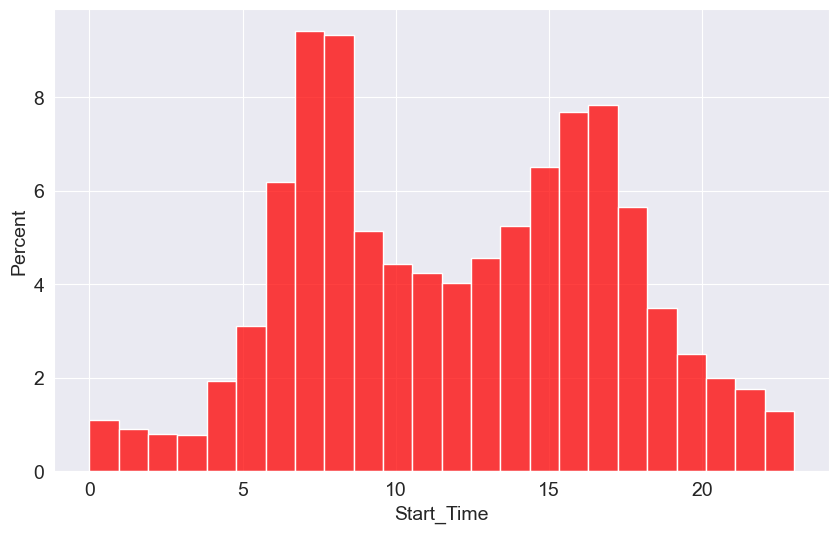

In [32]:
tuesdays_start_time = raw_df['Start_Time'][raw_df['Start_Time'].dt.dayofweek == 1]
sns.histplot(tuesdays_start_time.dt.hour, color='red', bins=24, stat='percent');

<h1 style=color:teal> WEDNESDAY</h1>

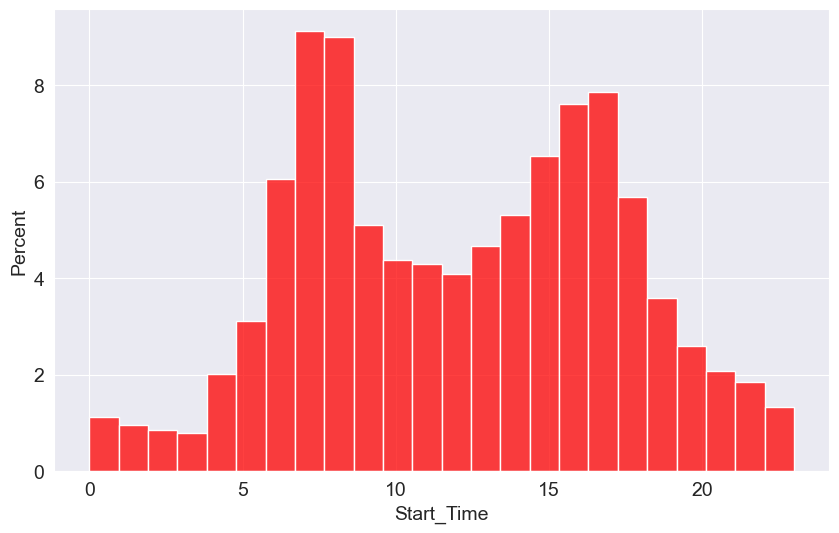

In [33]:
wednesdays_start_time = raw_df['Start_Time'][raw_df['Start_Time'].dt.dayofweek == 2]
sns.histplot(wednesdays_start_time.dt.hour, color='red', bins=24, stat='percent');

<h1 style=color:teal> THURSDAY</h1>

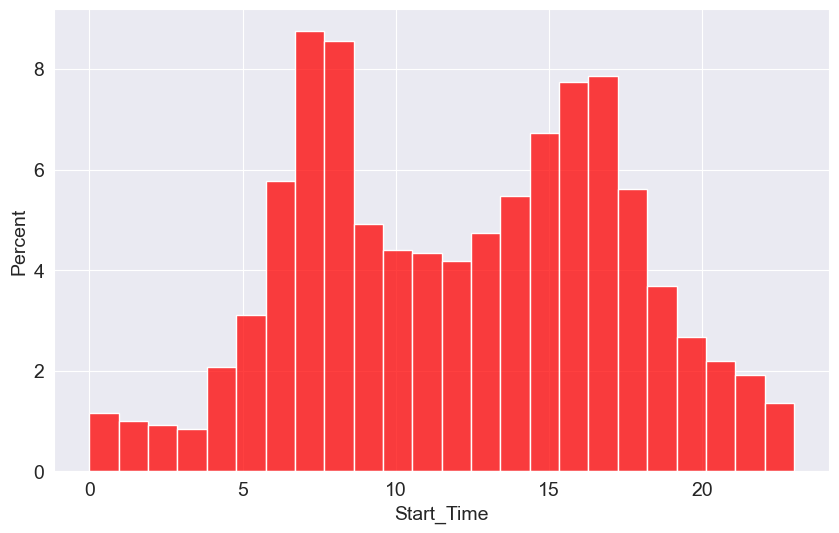

In [51]:
thursdays_start_time = raw_df['Start_Time'][raw_df['Start_Time'].dt.dayofweek == 3]
sns.histplot(thursdays_start_time.dt.hour, color='red', bins=24, stat='percent');

<h1 style=color:teal> FRIDAY</h1>

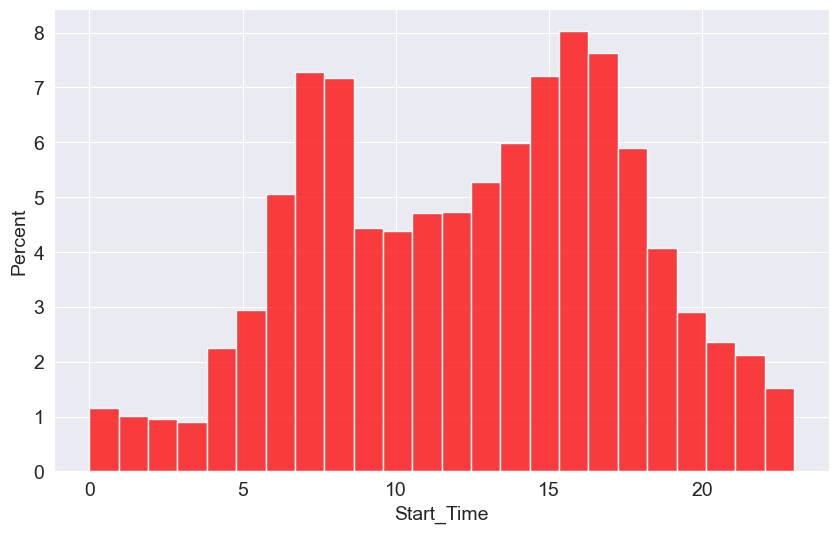

In [35]:
fridays_start_time = raw_df['Start_Time'][raw_df['Start_Time'].dt.dayofweek == 4]
sns.histplot(fridays_start_time.dt.hour, color='red', bins=24, stat='percent');

<h1 style=color:teal> SATURDAY</h1>

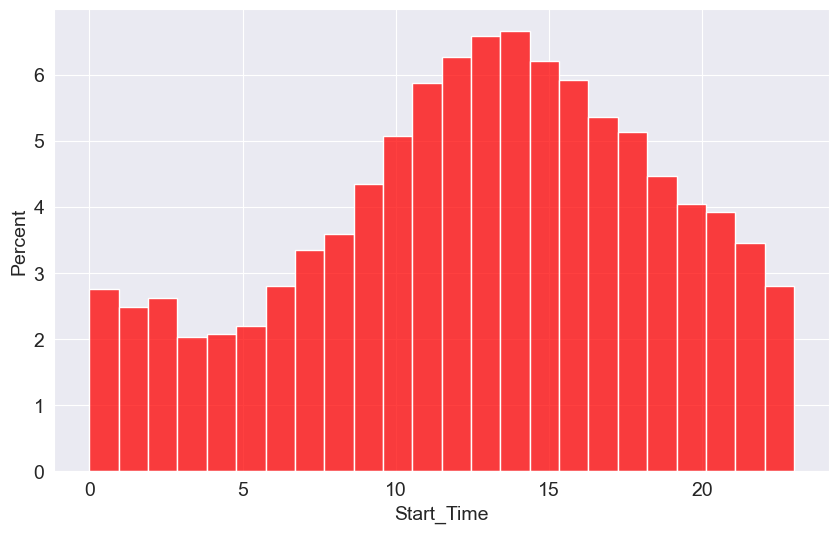

In [36]:
saturdays_start_time = raw_df['Start_Time'][raw_df['Start_Time'].dt.dayofweek == 5]
sns.histplot(saturdays_start_time.dt.hour, color='red', bins=24, stat='percent');

<h1 style=color:teal> SUNDAY</h1>

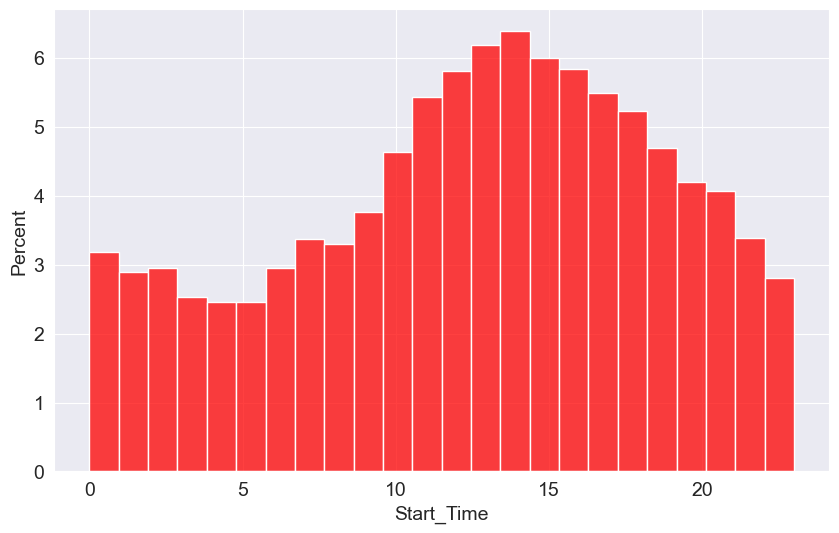

In [37]:
sundays_start_time = raw_df['Start_Time'][raw_df['Start_Time'].dt.dayofweek == 6]
sns.histplot(sundays_start_time.dt.hour, color='red', bins=24, stat='percent');

<UL>
<H3 STYLE=color:TEAL><LI> On workings i.e. monday, tuesday, wednesday, thurday, friday you'll find almost the same trend in accidents time.<LI><BR>
While on saturday and sunday the is a different trend i.e. from 10 am to 7 pm the frequency of accident is more.</H3>

<h1 style=color:teal> YEARS
</h1>

<h1 style=color:teal> 2019</h1>

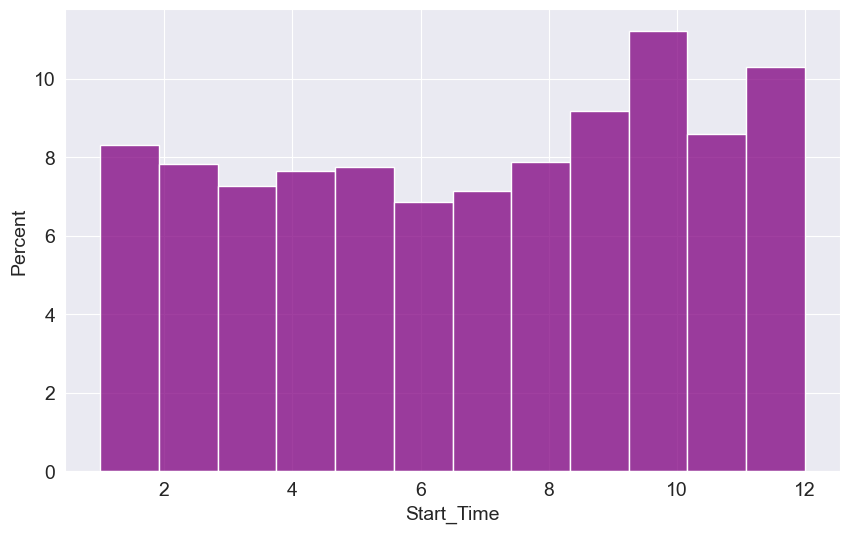

In [41]:
raw_df_2019 = raw_df[raw_df['Start_Time'].dt.year == 2019]
sns.histplot(raw_df_2019['Start_Time'].dt.month, color='purple', bins=12, stat='percent');

<h1 style=color:teal> 2020</h1>

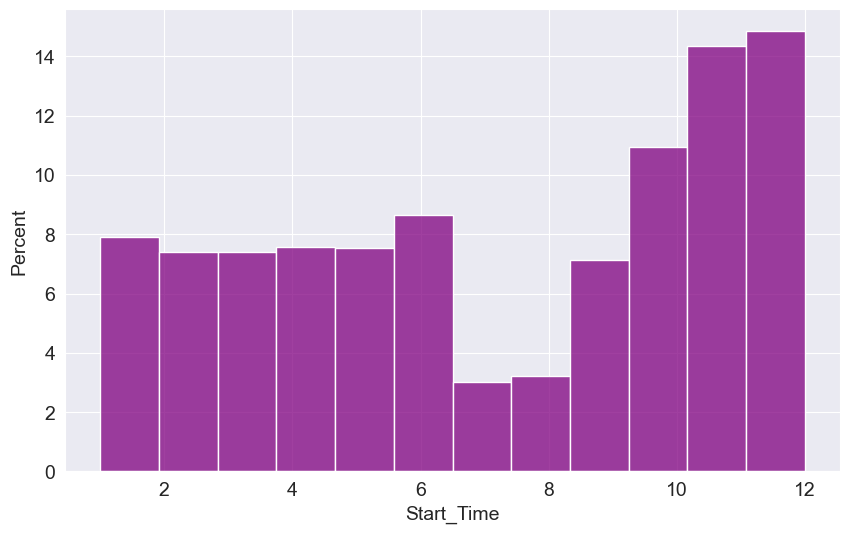

In [42]:
raw_df_2020 = raw_df[raw_df['Start_Time'].dt.year == 2020]
sns.histplot(raw_df_2020['Start_Time'].dt.month, color='purple', bins=12, stat='percent');

<h1 style=color:teal> 2021</h1>

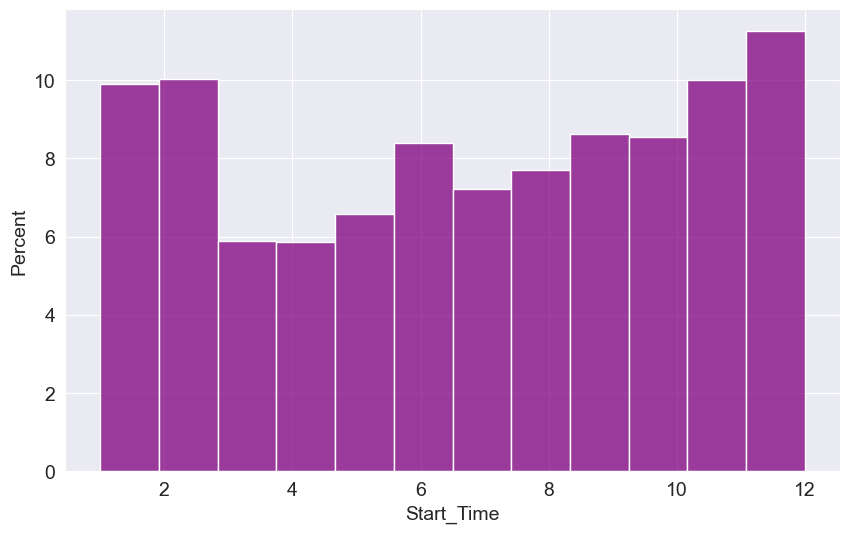

In [43]:
raw_df_2021 = raw_df[raw_df['Start_Time'].dt.year == 2021]
sns.histplot(raw_df_2021['Start_Time'].dt.month, color='purple', bins=12, stat='percent');

<h1 style=color:teal>2022</h1>

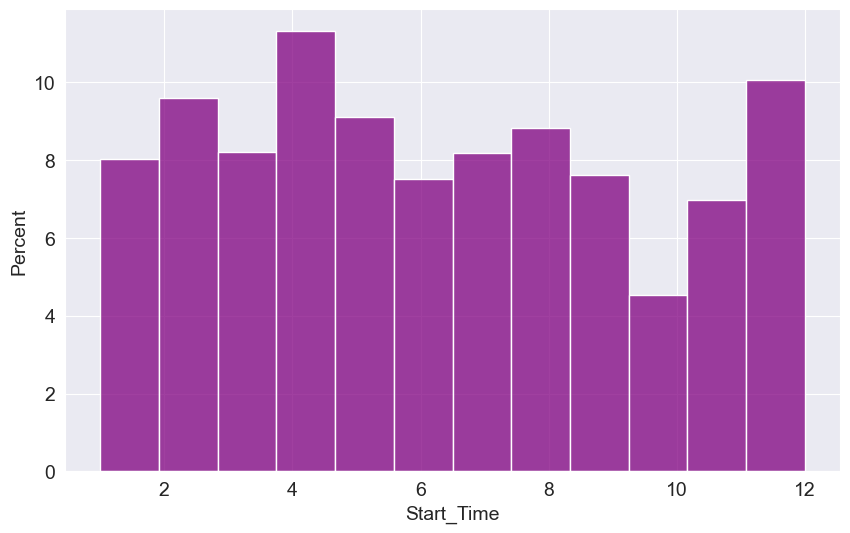

In [44]:
raw_df_2022 = raw_df[raw_df['Start_Time'].dt.year == 2022]
sns.histplot(raw_df_2022['Start_Time'].dt.month, color='purple', bins=12, stat='percent');

<h1 style=color:teal> Start_Lat, Start_lng</h1>

In [45]:
raw_df['Start_Lat']

0          39.865147
1          39.928059
2          39.063148
3          39.747753
4          39.627781
             ...    
7728389    34.002480
7728390    32.766960
7728391    33.775450
7728392    33.992460
7728393    34.133930
Name: Start_Lat, Length: 7728394, dtype: float64

In [46]:
raw_df['Start_Lng']

0          -84.058723
1          -82.831184
2          -84.032608
3          -84.205582
4          -84.188354
              ...    
7728389   -117.379360
7728390   -117.148060
7728391   -117.847790
7728392   -118.403020
7728393   -117.230920
Name: Start_Lng, Length: 7728394, dtype: float64

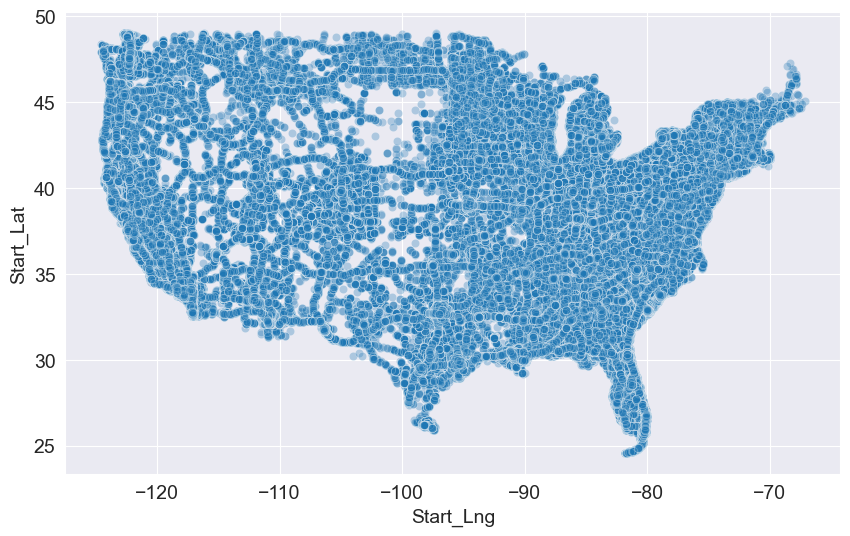

In [47]:
sns.scatterplot(data=raw_df,x='Start_Lng',y='Start_Lat',alpha=0.3);

In [48]:
import folium

# zip(list(raw_df.Start_Lat), list(raw_df.Start_Lng))

from folium.plugins import HeatMap
sample_df = raw_df.sample(int(0.001 * len(raw_df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

**Even Though we took a sample of data (Because of lots of data which was creating overload), we can see Lot's people live near bay areas.**

<h1 style="text-align:center; font-size:36px;color:TEAL">|||||| 📈 THANK YOU 💡 ||||||</h1>

.